In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [5]:
train_dir =r"C:\Users\dnyan\Downloads\archive\cifar10-32\train"
test_dir =r"C:\Users\dnyan\Downloads\archive\cifar10-32\test"

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
)

test_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
)

# here batch_size is the number of images in each batch
train_batch_size = 5000
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(32, 32),
    batch_size=train_batch_size,
    class_mode='categorical'
)
test_batch_size = 1000
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(32, 32),
    batch_size=test_batch_size,
    class_mode='categorical'
)

Found 50000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [7]:
x_train, y_train =  train_generator[0]
x_test, y_test = test_generator[0]

print(len(x_train))
print(len(x_test))

5000
1000


In [11]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [148]:

# Load VGG16 without top layers
weights_path = r"C:\Users\dnyan\Downloads\vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(32, 32, 3))

In [150]:
for layer in base_model.layers:
   layer.trainable = False

In [152]:
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
predictions = Dense(10, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [154]:
# Train the model
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 116ms/step - accuracy: 0.2054 - loss: 2.1881 - val_accuracy: 0.4340 - val_loss: 1.6220
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 119ms/step - accuracy: 0.4079 - loss: 1.6211 - val_accuracy: 0.4760 - val_loss: 1.5055
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 120ms/step - accuracy: 0.4771 - loss: 1.4738 - val_accuracy: 0.4890 - val_loss: 1.4755
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 15s 190ms/step - accuracy: 0.5173 - loss: 1.3837 - val_accuracy: 0.4940 - val_loss: 1.4303
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 17s 212ms/step - accuracy: 0.5329 - loss: 1.3071 - val_accuracy: 0.5210 - val_loss: 1.3928
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 18s 223ms/step - accuracy: 0.5592 - loss: 1.2462 - val_accuracy: 0.4930 - val_loss: 1.4269
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 17s 210ms/step - accuracy: 0.5853 - loss: 1.1866 - val_accuracy: 0.5220 - val_loss: 1.3542
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 16s 208ms/step - accuracy: 0.6065 - loss: 1.1255 - val_accura

In [36]:
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(32, 32, 3))
# freeze all layers first
for layer in base_model.layers:
   layer.trainable = False
# unfreeze last 4 layers of base model
for layer in base_model.layers[len(base_model.layers) - 4:]:
   layer.trainable = True
# fine-tuning hyper parameters
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
predictions = Dense(10, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# training fine tuned model
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 47s 578ms/step - accuracy: 0.2126 - loss: 2.1096 - val_accuracy: 0.4580 - val_loss: 1.4583
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 44s 563ms/step - accuracy: 0.4824 - loss: 1.4138 - val_accuracy: 0.5310 - val_loss: 1.3249
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 44s 562ms/step - accuracy: 0.6056 - loss: 1.1433 - val_accuracy: 0.5360 - val_loss: 1.4205
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 46s 580ms/step - accuracy: 0.6649 - loss: 0.9768 - val_accuracy: 0.6220 - val_loss: 1.1594
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 46s 583ms/step - accuracy: 0.7173 - loss: 0.8264 - val_accuracy: 0.6330 - val_loss: 1.1465
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 45s 567ms/step - accuracy: 0.7762 - loss: 0.6662 - val_accuracy: 0.6200 - val_loss: 1.2058
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 40s 502ms/step - accuracy: 0.8058 - loss: 0.5770 - val_accuracy: 0.6170 - val_loss: 1.3005
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 44s 561ms/step - accuracy: 0.8245 - loss: 0.5111 - val_accu

In [66]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [68]:
import matplotlib.pyplot as plt
predicted_value = model.predict(x_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step


In [70]:
labels = list(test_generator.class_indices.keys())


Preditcted:  frog
Actual:  frog


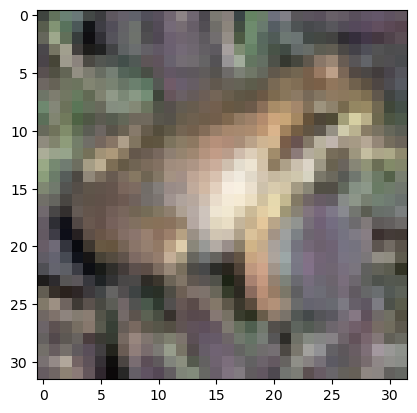

In [144]:
n = 890
plt.imshow(x_test[n])
print("Preditcted: ", (class_names[np.argmax(predicted_value[n])]))
print("Actual: ", (class_names[np.argmax(y_test[n])]))
